In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.utils import fill_infos

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

np.random.seed(294697)

In [2]:
chunk_size = 100000
sample_size_percent = 5

data = pd.DataFrame()

for chunk in pd.read_csv("./datas/en.openfoodfacts.org.products.csv", sep="\t", nrows=None, chunksize=chunk_size):
    actual_chunk_size = chunk.shape[0]
    random_size = int(actual_chunk_size * (sample_size_percent / 100))
    random_indexes = np.random.default_rng().choice(chunk.index, size=random_size, replace=False)
    chunk = chunk.loc[random_indexes]
    data = pd.concat([data, chunk])
    del chunk

data.shape

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,27,28,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,22,23,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self

(95978, 186)

In [3]:
rows_nb, cols_nb = data.shape

In [4]:
data.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
51405,24463061095,http://world-en.openfoodfacts.org/product/0024...,openfoodfacts-contributors,1475262578,2016-09-30T19:09:38Z,1617973285,2021-04-09T13:01:25Z,Sriracha chili sauce,NaN,NaN,482 g,"BOTELLA,PLASTICO,Plast,Plastic,01-PET,Green Do...","botella,plastico,plast,plastic,01-pet,green-do...",NaN,Huy Fong,huy-fong,"Groceries, Sauces, Hot sauces, Sriracha","en:groceries,en:sauces,en:hot-sauces,en:sriracha","Groceries,Sauces,Hot sauces,Sriracha","United States,California,de:ESTADOS UNIDOS","en:united-states,en:california,de:estados-unidos","United States,California,de:estados-unidos","ESTADOS UNIDOS,USA,United States","estados-unidos,usa,united-states",Green Dot,en:green-dot,Green Dot,NaN,NaN,NaN,NaN,NaN,"MEXICO,Sweden,Sverige,Australia","WALMART,Coop,Migros","France,Germany,Mexico,Sweden,Switzerland,Unite...","en:france,en:germany,en:mexico,en:sweden,en:sw...

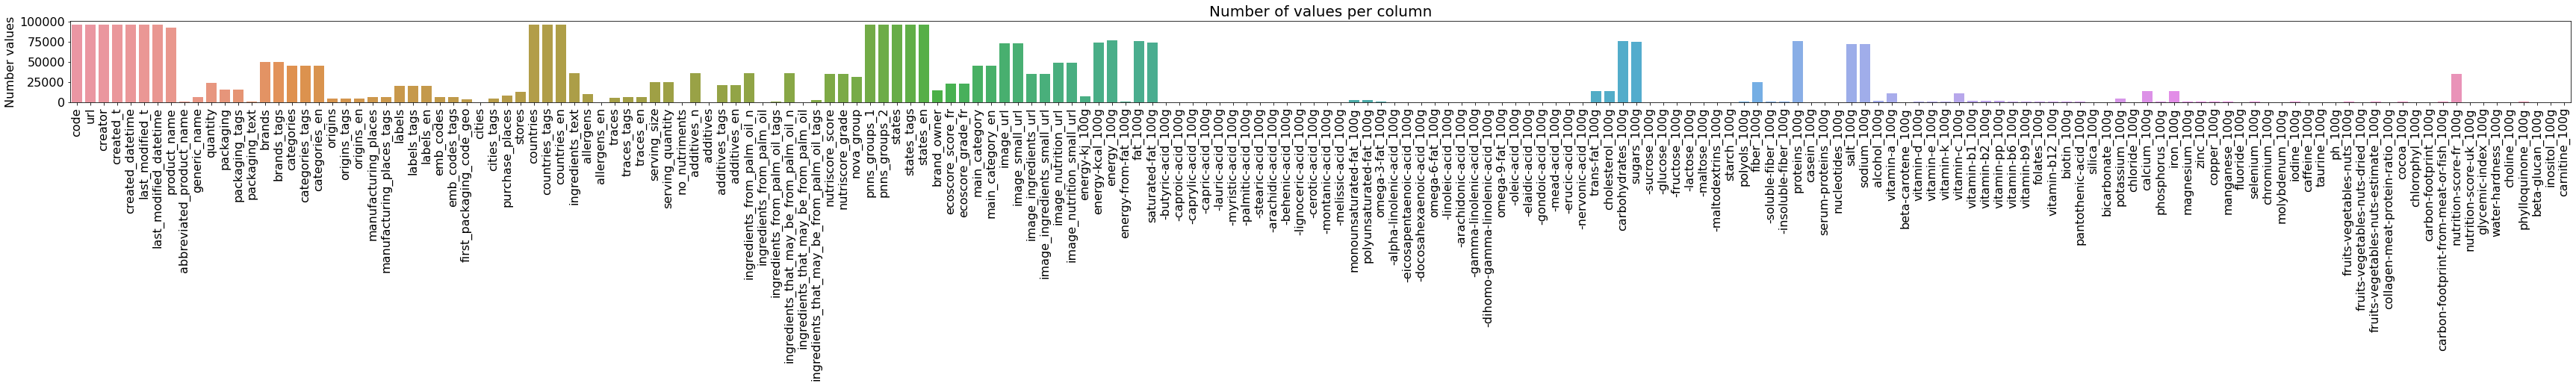

In [5]:
plt.figure(figsize=(60,2))

barplot = sns.barplot(x=data.columns, y=data.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=90, size=16)
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

Nutriscore is not quite well recorded.
Is there a way to calculate it from the others information ?

For that, we need to have the P and N ingredients of the nutriscore formula.

P (positive) ingredients:
- fruits, vegetable, nuts
- proteins
- fiber

N (negative) ingredients:
- sugar
- salt
- saturated fatty acid
- energy (kcal)

In [6]:
results = []
for ingredient in ["fruit", "vegetable", "nuts", "protein", "fiber", "sugar", "salt", "saturated-fat", "energy-kcal"]:
    for column in data.columns:
        if ingredient in column:
            results.append(column)
print(len(results))
results

21


['fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'proteins_100g',
 'serum-proteins_100g',
 'collagen-meat-protein-ratio_100g',
 'fiber_100g',
 '-soluble-fiber_100g',
 '-insoluble-fiber_100g',
 'sugars_100g',
 'salt_100g',
 'saturated-fat_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'energy-kcal_100g']

There are the fields needed for the nutriscore formulas, but:
- "fruits-vegetables-nuts_100g": maybe completement empty
- "fiber": maybe too fews records

In [7]:
nutriscore_features = [
    "fruits-vegetables-nuts_100g",
    "proteins_100g",
    "fiber_100g",
    "sugars_100g",
    "salt_100g",
    "saturated-fat_100g",
    "energy-kcal_100g"
]

In [8]:
nutriscore_data = data.loc[:, ["nutriscore_score", "nutriscore_grade", "nutrition-score-fr_100g"]]
nutriscore_data.head(10)

,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g
51405,11.0,d,11.0
48463,15.0,d,15.0
60163,15.0,d,15.0
68641,10.0,c,10.0
91193,23.0,e,23.0
40435,2.0,b,2.0
48370,14.0,d,14.0
52496,3.0,c,3.0
52392,-1.0,a,-1.0
54153,15.0,d,15.0


In [9]:
na = nutriscore_data.any(axis="columns")
print("at least one value: ", na.sum())
print("nutriscore_grade recorded: ", data.nutriscore_grade.notna().sum())
print("all rows: ", na.count())

at least one value:  34969
nutriscore_grade recorded:  34969
all rows:  95978


In [22]:
pd.set_option('display.max_colwidth', None)

ingredient_text_data = data[data.ingredients_text.notna()].ingredients_text
ingredient_text_data.head(5)

51405                                                                                                                                                                                                                                                                     chili, sugar, salt, garlic, distilled vinegar, potassium sorbate, sodium bisulfite as preservatives, and xanthan gum,
48463                                                                                                                                                                                                                                                              Sugar, corn syrup, citric acid, artificial and natural flavors, artificial colors (fd&c red 40, yellow 5, yellow 6, blue 1).
60163                                                                                                                                                                                                                                   

In [23]:
def search(row, col: str, match: list):
    for m in match:
        if m in row[col]:
            print("row[col]: ", row[col])
            return row[col].index

data[data.ingredients_text.notna()].iloc[:10].apply(lambda row: print(search(row, "ingredients_text", ["fruit", "vegetable", "nuts"])), axis=1)

None
None
None
None
None
None
None
None
None
None


51405    None
48463    None
60163    None
68641    None
91193    None
40435    None
48370    None
52496    None
52392    None
54153    None
dtype: object

In [ ]:
data.iloc[:10,:].loc[:,["countries", "countries_tags", "countries_en"]]

,countries,countries_tags,countries_en
69481,"Royaume-Uni,en:france","en:france,en:united-kingdom","France,United Kingdom"
75184,United States,en:united-states,United States
24202,en:United States,en:united-states,United States
26556,United States,en:united-states,United States
49042,United States,en:united-states,United States
4720,en:PK,en:pakistan,Pakistan
84903,United States,en:united-states,United States
96803,United States,en:united-states,United States
93821,United States,en:united-states,United States
49944,United States,en:united-states,United States


In [ ]:
fill_infos(data, "countries_en")

countries_en total rows:  95680
countries_en filled count:  95382
countries_en filled percentage:  3.210738255033557


***

In [ ]:
features = [
    "code",
    "url",
    "product_name",
    "abbreviated_product_name",
    "generic_name",
    "brands",
    "brands_tags",
    "origins",
    "origins_tags",
    "origins_en",
    "manufacturing_places",
    "manufacturing_places_tags",
    "cities",
    "cities_tags",
    "purchase_places",
    "countries",
    "countries_tags",
    "countries_en",
    "nutriscore_score",
    "nutriscore_grade",
    "brand_owner",
    "ecoscore_score_fr",
    "ecoscore_grade_fr",
    "image_url",
    "image_small_url",
    ]

In [ ]:
some = data.loc[:, features]